In [115]:
import pandas as pd
import seaborn as sns
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import scipy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pickle
from joblib import dump, load

In [116]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

In [117]:
data = pd.read_csv("/home/mike/python_files/ML_services/data/NHANES_age_prediction.csv")
data["age_group"]

0       Adult
1       Adult
2       Adult
3       Adult
4       Adult
        ...  
2273    Adult
2274    Adult
2275    Adult
2276    Adult
2277    Adult
Name: age_group, Length: 2278, dtype: object

In [118]:
le = LabelEncoder()

In [119]:
le.fit(data["age_group"])
data["age_group"] = le.transform(data["age_group"])
data

SEQN  age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  \
0     73564.0          0      61.0       2.0     2.0    35.7   110.0     2.0   
1     73568.0          0      26.0       2.0     2.0    20.3    89.0     2.0   
2     73576.0          0      16.0       1.0     2.0    23.2    89.0     2.0   
3     73577.0          0      32.0       1.0     2.0    28.9   104.0     2.0   
4     73580.0          0      38.0       2.0     1.0    35.9   103.0     2.0   
...       ...        ...       ...       ...     ...     ...     ...     ...   
2273  83711.0          0      38.0       2.0     2.0    33.5   100.0     2.0   
2274  83712.0          0      61.0       1.0     2.0    30.0    93.0     2.0   
2275  83713.0          0      34.0       1.0     2.0    23.7   103.0     2.0   
2276  83718.0          0      60.0       2.0     2.0    27.4    90.0     2.0   
2277  83727.0          0      26.0       1.0     2.0    24.5   108.0     2.0   

      LBXGLT  LBXIN  
0      150.0  14.91  
1       80.0   3.85  
2       68.0   6.14  
3       84.0  16.15  
4       81.0  10.92  
...      ...    ...  
2273    73.0   6.53  
2274   208.0  13.02  
2275   124.0  21.41  
2276   108.0   4.99  
2277   108.0   3.76  

[2278 rows x 10 columns]

<Axes: >

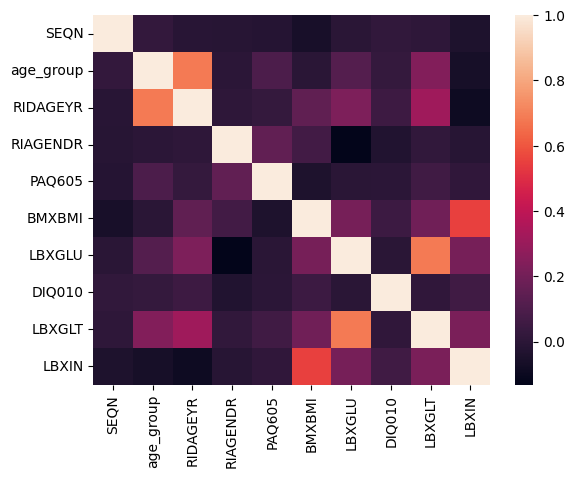

In [120]:
sns.heatmap(data.corr())

In [121]:
# train_X, test_X, train_y, test_y = train_test_split(data.drop(["age_group", "SEQN", "RIDAGEYR"], axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
train_X, test_X, train_y, test_y = train_test_split(data.drop("age_group", axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
# mms = MinMaxScaler()
# mms.fit(pd.concat((train_X,test_X)).sort_index())
# train_X = pd.DataFrame(mms.transform(train_X))
# test_X = pd.DataFrame(mms.transform(test_X))
# train_X

<Axes: xlabel='0', ylabel='1'>

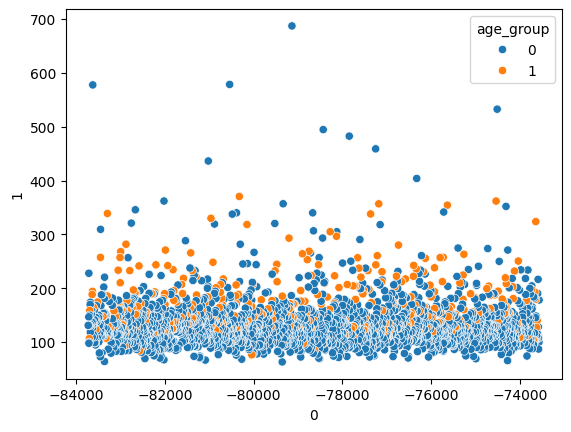

In [122]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(data.drop("age_group", axis=1))
data_for_draw = np.matmul(data.drop("age_group", axis=1), pca.components_.T)
sns.scatterplot(data=data_for_draw, x=data_for_draw[0], y=data_for_draw[1], hue=data["age_group"])

In [123]:
data_for_draw

0           1
0    -73563.998649  178.104365
1    -73567.998318   99.690501
2    -73575.997014   86.957320
3    -73576.995016  109.218527
4    -73579.994017  107.005518
...            ...         ...
2273 -83710.993985   97.670376
2274 -83712.005565  227.744029
2275 -83712.998624  146.661413
2276 -83717.997440  131.346950
2277 -83726.999656  130.823194

[2278 rows x 2 columns]

In [124]:
# train_X, test_X, train_y, test_y = train_test_split(data['RIDAGEYR'], data["age_group"], test_size=0.2, stratify=data["age_group"])
# train_X = np.expand_dims(train_X.to_numpy(), axis=-1)
# test_X = np.ex"pand_dims(test_X.to_numpy(), axis=-1)
train_X, test_X, train_y, test_y = train_test_split(data.drop(["age_group", "SEQN", "RIDAGEYR"], axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
mms = MinMaxScaler()
mms.fit(pd.concat((train_X,test_X)).sort_index())
train_X = pd.DataFrame(mms.transform(train_X))
test_X = pd.DataFrame(mms.transform(test_X))
train_X

0         1         2         3    4         5         6
0     1.0  0.166667  0.428058  0.096491  0.5  0.106383  0.077925
1     1.0  0.166667  0.142086  0.114035  0.5  0.113475  0.125208
2     0.0  0.000000  0.262590  0.131579  0.5  0.101064  0.066275
3     1.0  0.166667  0.293165  0.061404  1.0  0.085106  0.131865
4     1.0  0.166667  0.174460  0.204678  0.5  0.164894  0.087127
...   ...       ...       ...       ...  ...       ...       ...
1817  0.0  0.166667  0.208633  0.128655  0.5  0.118794  0.459520
1818  0.0  0.166667  0.285971  0.467836  0.0  0.382979  0.092413
1819  0.0  0.166667  0.230216  0.061404  0.5  0.117021  0.030641
1820  1.0  0.166667  0.386691  0.087719  0.5  0.150709  0.124816
1821  0.0  0.000000  0.095324  0.108187  0.5  0.072695  0.059031

[1822 rows x 7 columns]

In [125]:
test_X

0         1         2         3    4         5         6
0    0.0  0.166667  0.214029  0.125731  0.5  0.003546  0.077044
1    1.0  0.166667  0.323741  0.087719  0.5  0.097518  0.073519
2    1.0  0.166667  0.446043  0.172515  1.0  0.235816  0.225453
3    1.0  0.166667  0.311151  0.096491  0.5  0.101064  0.085756
4    1.0  0.000000  0.285971  0.111111  0.5  0.159574  0.071953
..   ...       ...       ...       ...  ...       ...       ...
451  1.0  0.166667  0.127698  0.052632  0.5  0.101064  0.019285
452  0.0  0.166667  0.158273  0.058480  0.5  0.063830  0.060499
453  0.0  0.166667  0.176259  0.134503  1.0  0.168440  0.086735
454  1.0  0.166667  0.561151  0.076023  0.5  0.118794  0.460597
455  1.0  0.166667  0.275180  0.119883  0.5  0.046099  0.101615

[456 rows x 7 columns]

In [126]:
features = {'n_estimators' : list(range(1, 20, 3)),
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1, 13, 4)),
    'min_samples_split': list(range(2, 20, 4)),
    'min_samples_leaf': list(range(2, 20, 4)),}
gscv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=features, verbose=2)

In [127]:
# gscv.fit(train_X, train_y)


RandomForestClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=18, n_estimators=16)

In [128]:
# train_X, test_X, train_y, test_y = train_test_split(data['RIDAGEYR'], data["age_group"], test_size=0.2, stratify=data["age_group"])
# train_X = np.expand_dims(train_X.to_numpy(), axis=-1)
# test_X = np.ex"pand_dims(test_X.to_numpy(), axis=-1)
train_X, test_X, train_y, test_y = train_test_split(data.drop(["age_group", "SEQN"], axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
mms = MinMaxScaler()
mms.fit(pd.concat((train_X,test_X)).sort_index())
train_X = pd.DataFrame(mms.transform(train_X))
test_X = pd.DataFrame(mms.transform(test_X))
train_X

0    1         2         3         4    5         6         7
0     0.117647  1.0  0.166667  0.388489  0.052632  0.5  0.187943  0.077631
1     0.382353  0.0  0.166667  0.120504  0.084795  0.5  0.168440  0.039452
2     0.485294  0.0  0.166667  0.138489  0.128655  0.5  0.111702  0.115712
3     0.044118  1.0  0.166667  0.068345  0.076023  0.5  0.106383  0.040235
4     0.441176  1.0  0.166667  0.086331  0.070175  0.5  0.090426  0.025453
...        ...  ...       ...       ...       ...  ...       ...       ...
1817  0.750000  0.0  0.166667  0.174460  0.213450  0.5  0.140071  0.024474
1818  1.000000  0.0  0.166667  0.210432  0.119883  0.5  0.115248  0.040822
1819  0.176471  1.0  0.166667  0.285971  0.058480  0.5  0.187943  0.156241
1820  0.838235  0.0  0.166667  0.086331  0.096491  0.5  0.070922  0.027509
1821  0.720588  1.0  0.166667  0.381295  0.137427  0.5  0.195035  0.144591

[1822 rows x 8 columns]

In [129]:
rfc = RandomForestClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=18, n_estimators=16)
rfc.fit(train_X, train_y)
y_pred = rfc.predict(test_X)

In [130]:
precision_score(test_y, y_pred)

1.0

In [131]:
recall_score(test_y, y_pred)

1.0

In [132]:
f1_score(test_y, y_pred)

1.0

In [133]:
rfc_pickle = pickle.dumps(rfc)
dump(rfc_pickle, '/home/mike/python_files/ML_services/ml_models/random_forest_classifier_w_ridageyr.joblib') 

['/home/mike/python_files/ML_services/ml_models/random_forest_classifier_w_ridageyr.joblib']

In [134]:
train_X, test_X, train_y, test_y = train_test_split(data.drop(["age_group", "SEQN", "RIDAGEYR"], axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
mms = MinMaxScaler()
mms.fit(pd.concat((train_X,test_X)))
train_X = pd.DataFrame(mms.transform(train_X))
test_X = pd.DataFrame(mms.transform(test_X))

In [135]:
abc = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)
abc.fit(train_X, train_y)
y_pred = abc.predict(test_X)

In [136]:
precision_score(test_y, y_pred)

0.27184466019417475

In [137]:
recall_score(test_y, y_pred)

0.3835616438356164

In [138]:
f1_score(test_y, y_pred)

0.3181818181818182

In [139]:
abc_pickle = pickle.dumps(abc)
dump(abc_pickle, '/home/mike/python_files/ML_services/ml_models/ada_boost_classifier_wo_ridageyr.joblib') 

['/home/mike/python_files/ML_services/ml_models/ada_boost_classifier_wo_ridageyr.joblib']

In [140]:
train_X, test_X, train_y, test_y = train_test_split(data.drop(["age_group", "SEQN", "RIDAGEYR"], axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
mms = MinMaxScaler()
mms.fit(pd.concat((train_X,test_X)))
train_X = pd.DataFrame(mms.transform(train_X))
test_X = pd.DataFrame(mms.transform(test_X))

In [141]:
bc = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10)
bc.fit(train_X, train_y)
y_pred = bc.predict(test_X)

In [142]:
precision_score(test_y, y_pred)

0.36666666666666664

In [143]:
recall_score(test_y, y_pred)

0.1506849315068493

In [144]:
f1_score(test_y, y_pred)

0.21359223300970873

In [145]:
bc = pickle.dumps(bc)
dump(bc, '/home/mike/python_files/ML_services/ml_models/bagging_classifier_wo_ridageyr.joblib') 

['/home/mike/python_files/ML_services/ml_models/bagging_classifier_wo_ridageyr.joblib']

In [146]:
train_X, test_X, train_y, test_y = train_test_split(data.drop(["age_group", "SEQN"], axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
mms = MinMaxScaler()
mms.fit(pd.concat((train_X,test_X)))
train_X = pd.DataFrame(mms.transform(train_X))
test_X = pd.DataFrame(mms.transform(test_X))

In [147]:
gbc = GradientBoostingClassifier()
gbc.fit(train_X, train_y)
y_pred = gbc.predict(test_X)

In [148]:
precision_score(test_y, y_pred)

1.0

In [149]:
recall_score(test_y, y_pred)

1.0

In [150]:
f1_score(test_y, y_pred)

1.0

In [151]:
gbc = pickle.dumps(gbc)
dump(gbc, '/home/mike/python_files/ML_services/ml_models/gradient_boosting_w_ridageyr.joblib') 

['/home/mike/python_files/ML_services/ml_models/gradient_boosting_w_ridageyr.joblib']

In [152]:
train_X, test_X, train_y, test_y = train_test_split(data.drop(["age_group", "SEQN", "RIDAGEYR"], axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
# train_X, test_X, train_y, test_y = train_test_split(data.drop("age_group", axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
mms = MinMaxScaler()
mms.fit(pd.concat((train_X,test_X)))
train_X = pd.DataFrame(mms.transform(train_X))
test_X = pd.DataFrame(mms.transform(test_X))
train_X

0         1         2         3    4         5         6
0     1.0  0.166667  0.417266  0.198830  0.5  0.205674  0.211845
1     0.0  0.166667  0.294964  0.119883  0.5  0.136525  0.109153
2     0.0  0.166667  0.237410  0.140351  0.5  0.131206  0.131473
3     1.0  0.000000  0.183453  0.116959  0.5  0.157801  0.066275
4     0.0  0.166667  0.232014  0.216374  0.5  0.251773  0.064415
...   ...       ...       ...       ...  ...       ...       ...
1817  1.0  0.166667  0.401079  0.093567  0.5  0.150709  0.355164
1818  0.0  0.000000  0.273381  0.096491  0.5  0.124113  0.067548
1819  1.0  0.166667  0.302158  0.108187  0.5  0.120567  0.081253
1820  0.0  0.166667  0.079137  0.067251  0.5  0.067376  0.038375
1821  0.0  0.000000  0.221223  0.172515  0.5  0.141844  0.148116

[1822 rows x 7 columns]

In [153]:
rfc = RandomForestClassifier(n_estimators=7)
rfc.fit(train_X, train_y)
y_pred = rfc.predict(test_X)

In [154]:
precision_score(test_y, y_pred)

0.4473684210526316

In [155]:
recall_score(test_y, y_pred)

0.2328767123287671

In [156]:
f1_score(test_y, y_pred)

0.3063063063063063

In [157]:
rfc.feature_importances_

array([0.0314784 , 0.01642347, 0.22464021, 0.19388191, 0.01384275,
       0.26702606, 0.2527072 ])

In [158]:
# train_X, test_X, train_y, test_y = train_test_split(data.drop(["age_group", "SEQN", "RIDAGEYR"], axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
train_X, test_X, train_y, test_y = train_test_split(data.drop("age_group", axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
mms = MinMaxScaler()
mms.fit(pd.concat((train_X,test_X)))
train_X = pd.DataFrame(mms.transform(train_X))
test_X = pd.DataFrame(mms.transform(test_X))

In [159]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
y_pred = lr.predict(test_X)

In [160]:
f1_score(test_y, y_pred)

0.9104477611940298

In [161]:
lr = pickle.dumps(lr)
dump(lr, '/home/mike/python_files/ML_services/ml_models/logistic_w_ridageyr.joblib') 

['/home/mike/python_files/ML_services/ml_models/logistic_w_ridageyr.joblib']

In [162]:
train_X, test_X, train_y, test_y = train_test_split(data.drop(["age_group", "SEQN", "RIDAGEYR"], axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
# train_X, test_X, train_y, test_y = train_test_split(data.drop("age_group", axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
mms = MinMaxScaler()
mms.fit(pd.concat((train_X,test_X)))
train_X = pd.DataFrame(mms.transform(train_X))
test_X = pd.DataFrame(mms.transform(test_X))

In [163]:
svc = SVC()
svc.fit(train_X, train_y)
y_pred = svc.predict(test_X)

In [164]:
f1_score(test_y, y_pred)

0.02631578947368421

In [165]:
# train_X, test_X, train_y, test_y = train_test_split(data.drop(["age_group", "SEQN", "RIDAGEYR"], axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
train_X, test_X, train_y, test_y = train_test_split(data.drop("age_group", axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
mms = MinMaxScaler()
mms.fit(pd.concat((train_X,test_X)))
train_X = pd.DataFrame(mms.transform(train_X))
test_X = pd.DataFrame(mms.transform(test_X))

In [166]:
dtc = DecisionTreeClassifier()
dtc.fit(train_X, train_y)
y_pred = dtc.predict(test_X)

In [167]:
f1_score(test_y, y_pred)

1.0

In [168]:
dtc = pickle.dumps(dtc)
dump(dtc, '/home/mike/python_files/ML_services/ml_models/decision_tree_w_ridageyr.joblib') 

['/home/mike/python_files/ML_services/ml_models/decision_tree_w_ridageyr.joblib']

In [169]:
# train_X, test_X, train_y, test_y = train_test_split(data.drop(["age_group", "SEQN", "RIDAGEYR"], axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
train_X, test_X, train_y, test_y = train_test_split(data.drop("age_group", axis=1), data["age_group"], test_size=0.2, stratify=data["age_group"])
mms = MinMaxScaler()
mms.fit(pd.concat((train_X,test_X)))
train_X = pd.DataFrame(mms.transform(train_X))
test_X = pd.DataFrame(mms.transform(test_X))

In [170]:
knn = KNeighborsClassifier()
knn.fit(train_X, train_y)
y_pred = knn.predict(test_X)

In [171]:
f1_score(test_y, y_pred)

0.8695652173913043